# **Exercises on Supervised Machine Learning - Regressions in Practice**

Exercise 2: Finance – Stock Price Prediction (Regression)

In [33]:
#Import all required Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
#1. Data Loading & Exploration
stock_data = pd.read_csv('/content/Extended_Stock_Price_Dataset.csv')

In [13]:
stock_data.head()

,Date,Open,High,Low,Close,Volume
0,2023-01-02,150.0,152.0,149.5,151.0,1000000
1,2023-01-03,152.3,153.5,151.0,152.0,1100000
2,2023-01-04,151.5,152.0,150.0,151.8,1050000
3,2023-01-05,153.0,154.5,152.0,154.0,1200000
4,2023-01-06,155.0,156.0,154.0,155.5,1150000


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    410 non-null    object 
 1   Open    410 non-null    float64
 2   High    410 non-null    float64
 3   Low     410 non-null    float64
 4   Close   410 non-null    float64
 5   Volume  410 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 19.3+ KB


In [15]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='mixed')
stock_data.set_index('Date', inplace=True)

In [16]:
stock_data.sort_index(inplace=True)

In [17]:
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,150.0,152.0,149.5,151.0,1000000
2023-01-03,152.3,153.5,151.0,152.0,1100000
2023-01-04,151.5,152.0,150.0,151.8,1050000
2023-01-05,153.0,154.5,152.0,154.0,1200000
2023-01-06,155.0,156.0,154.0,155.5,1150000


In [18]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2023-01-02 to 2024-02-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    410 non-null    float64
 1   High    410 non-null    float64
 2   Low     410 non-null    float64
 3   Close   410 non-null    float64
 4   Volume  410 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.2 KB


In [19]:
# Check for missing values
print("Missing values per column:")
print(stock_data.isnull().sum())

# Find duplicate rows
duplicate_rows = stock_data[stock_data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing values per column:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume]
Index: []


No Null and No duplicate rows.

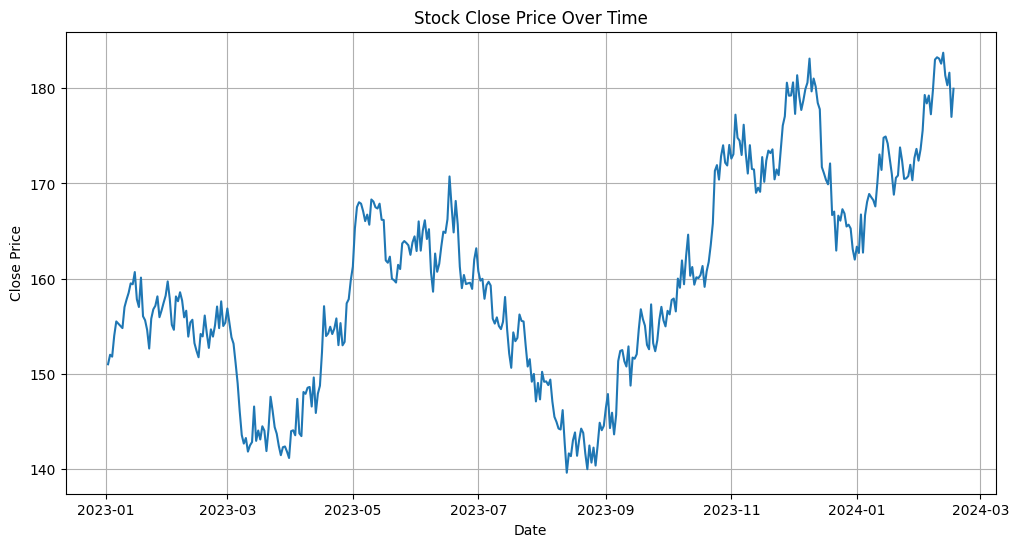

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'])
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

**Observation:**

Overall Trend: The stock price shows an overall upward trend from the beginning of 2023 to early 2024, although there are fluctuations within this period.

Oscillations: There are noticeable oscillations within the upward trend. The price seems to fluctuate within certain ranges before breaking out to higher levels. For example, there's a dip in early 2023, a period of relative stability and then a significant increase in the latter half of 2023.

Volatile Periods: While there isn't extreme, sudden volatility, there are periods of steeper increases and decreases. The period from around September 2023 to November 2023 shows a relatively rapid increase, followed by some fluctuations. Similarly, there are noticeable dips, like the one in early 2023 and another around January 2024.
These observations suggest that a model predicting this stock price would need to capture both the overall upward trend and the shorter-term oscillations and periods of increased movement.

In [21]:
#2. Feature Engineering & Preparation
stock_data['NextClose'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)

In [22]:
stock_data.head()

,Open,High,Low,Close,Volume,NextClose
Date,,,,,,
2023-01-02,150.0,152.0,149.5,151.0,1000000,152.0
2023-01-03,152.3,153.5,151.0,152.0,1100000,151.8
2023-01-04,151.5,152.0,150.0,151.8,1050000,154.0
2023-01-05,153.0,154.5,152.0,154.0,1200000,155.5
2023-01-06,155.0,156.0,154.0,155.5,1150000,154.8


In [23]:
X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']] #feature
y = stock_data['NextClose'] #target variable

In [24]:
print("Missing values in features (X):")
print(X.isnull().sum())
print("\nMissing values in target (y):")
print(y.isnull().sum())

Missing values in features (X):
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Missing values in target (y):
0


In [25]:
#3. Model Training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
model=LinearRegression()
model.fit(X_train,y_train) # from all the independent values or data my model gets trained
#i.e. machine learning has been done

LinearRegression()

In [27]:
y_pred=model.predict(X_test)

In [28]:
y_pred #Predicted

array([159.60908992, 159.71921994, 168.72813313, 149.5209785 ,
       143.83494643, 159.91789748, 171.2005511 , 140.68176239,
       180.43391986, 142.27696435, 166.4601028 , 141.76060146,
       160.79130431, 180.11984166, 160.99323379, 146.16006475,
       164.79969708, 146.04131843, 160.2896566 , 145.36426161,
       171.85461194, 142.62624795, 155.2515668 , 143.73234273,
       152.03242586, 155.55258975, 169.00295872, 153.42754317,
       162.43220578, 154.48658193, 179.34075522, 149.71752594,
       144.36071262, 156.03894195, 151.82955359, 151.37346572,
       173.94080793, 172.12565895, 154.0676189 , 154.66723831,
       141.05138643, 143.04730765, 171.36202798, 167.48690377,
       156.34623278, 156.13189461, 179.6565629 , 165.32084198,
       151.96122088, 179.76643828, 143.70661615, 155.15385661,
       139.94412806, 158.1961636 , 151.94402053, 162.11645048,
       166.76748785, 163.59196754, 156.7061513 , 141.26166591,
       154.59216244, 183.43828717, 166.20263153, 144.04

In [29]:
y_test #Actual

,NextClose
Date,
2023-06-25,159.506350
2023-05-21,159.584834
2023-05-10,168.098333
2023-04-08,148.532829
2023-03-17,144.482902
...,...
2023-06-05,164.162748
2023-01-09,157.000000
2023-02-18,154.247582


In [30]:
y_test.head()

,NextClose
Date,
2023-06-25,159.506350
2023-05-21,159.584834
2023-05-10,168.098333
2023-04-08,148.532829
2023-03-17,144.482902


In [34]:
#4. Model Evaluation & Analysis
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 1.48495345412101
Mean Squared Error (MSE): 3.3621087025854752
Root Mean Squared Error (RMSE): 1.833605383550527
R-squared (R2) Score: 0.9713524999028296


In [35]:
# Naive Baseline: Predict next day's close is the same as today's close
# The test set contains the current day's features (X_test) and the actual next day's close (y_test).
# The 'Close' column in X_test represents today's closing price.
y_pred_naive = X_test['Close']

# Calculate MAE and RMSE for the naive baseline
mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))

print("Naive Baseline MAE:", mae_naive)
print("Naive Baseline RMSE:", rmse_naive)

print("\nLinear Regression Model MAE:", mae)
print("Linear Regression Model RMSE:", rmse)

Naive Baseline MAE: 1.6272906300944991
Naive Baseline RMSE: 1.9570716684104523

Linear Regression Model MAE: 1.48495345412101
Linear Regression Model RMSE: 1.833605383550527


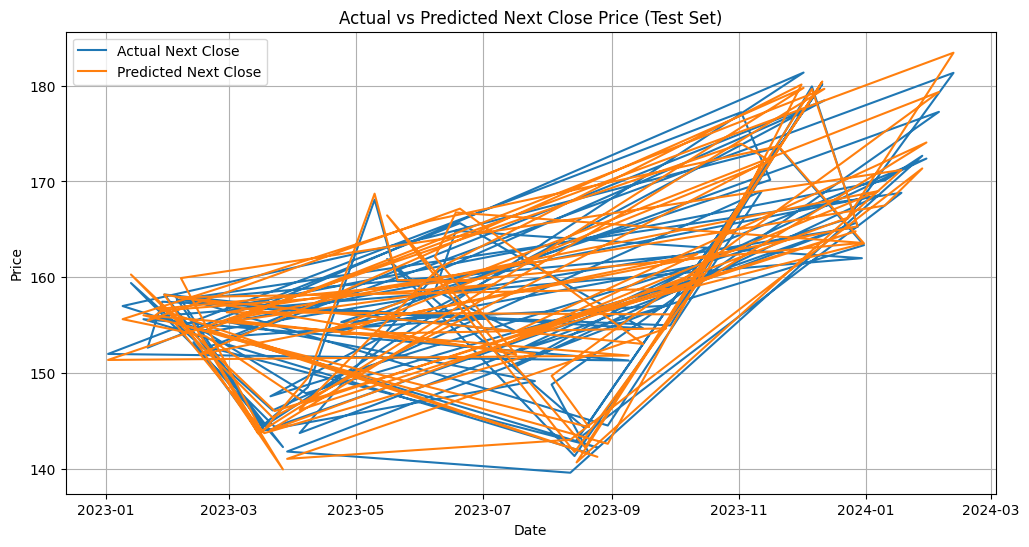

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Next Close')
plt.plot(y_test.index, y_pred, label='Predicted Next Close')
plt.title('Actual vs Predicted Next Close Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Interpret the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)

# The intercept is also important
print("\nIntercept:", model.intercept_)

Model Coefficients:
         Coefficient
Open    3.661502e-01
High   -5.892294e-01
Low    -7.056880e-01
Close   1.930520e+00
Volume -2.182833e-07

Intercept: 0.22389915202307975


## **Summary:**

Model Performance:

The linear regression model achieved a Mean Absolute Error (MAE) of approximately 1.4849 and a Root Mean Squared Error (RMSE) of approximately 1.8336 on the test set. The R-squared (R2) score is around 0.97135, indicating that the model explains about 0.97135, indicating that the model explains about 0.97135 of the variance in the next day's closing price in the test set. These metrics suggest a reasonably good performance for predicting stock prices, especially considering the inherent volatility.

Baseline Comparison: Our linear regression model did beat the naive baseline. The model's MAE 1.4849 is lower than the naive baseline's MAE 1.6272, and similarly, the model's RMSE 1.8336 is lower than the naive baseline's RMSE 1.9571. This indicates that the linear regression model is capturing some patterns beyond simply predicting the current day's price for the next day.

Learned Patterns: Looking at the model coefficients, the 'Close' price from the current day has the largest positive coefficient 1.9305. This suggests that the model primarily learned that tomorrow's closing price is strongly influenced by today's closing price, with a coefficient close to 1.0. The 'Open', 'High', and 'Low' prices also have some influence, with negative coefficients in this case, while 'Volume' has a very small coefficient, indicating less linear impact on the next day's price in this model. As observed in the plot, the linear model tends to smooth out predictions and might not fully capture sudden, large price swings, which could be driven by external factors not included in this dataset.